<a href="https://colab.research.google.com/github/Sharmariyaa/Airbnb-data-analysis/blob/main/Riya_Sharma_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

## Import the Libraries and Uploading the Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
url='https://drive.google.com/file/d/1ioU5r9KEYSfwgfUi22SclVkx4l1a_8ou/view?usp=share_link'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
airbnb_data_df = pd.read_csv(url)

In [ ]:
#Observe the first five rows of the dataframe.
airbnb_data_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## Take a Look of our Data

In [ ]:
airbnb_data_df.shape

(48895, 16)

That is in our dataframe total number of rows are 48895 and total number of Columns are 16.

In [ ]:
airbnb_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
airbnb_data_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


## Number of Properties in each neighbourhood group(Location)

In [ ]:
property_count=airbnb_data_df['neighbourhood_group'].value_counts().reset_index()
property_count


,index,neighbourhood_group
0,Manhattan,21661
1,Brooklyn,20104
2,Queens,5666
3,Bronx,1091
4,Staten Island,373


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  after removing the cwd from sys.path.


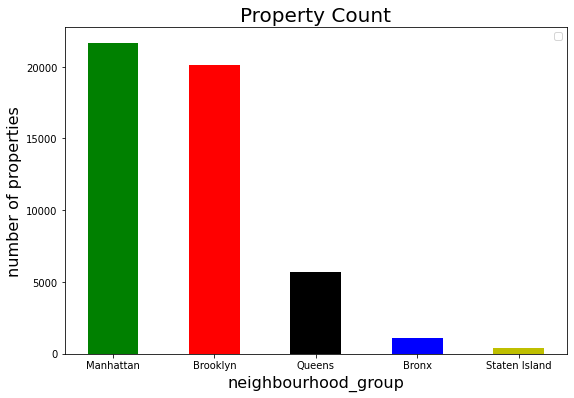

In [ ]:
w=0.5
plt.figure(figsize=(9,6))
bar_y=np.arange(5)
plt.bar(bar_y,property_count['neighbourhood_group'],w,color='grkby')
plt.xlabel('neighbourhood_group',size=16)
plt.ylabel('number of properties',size=16)
plt.title('Property Count',size=20)
plt.xticks(bar_y,property_count['index'])
plt.legend()
plt.show()


From above graph we conclude that Mahattan and Brooklyn has maximum number of properties may be the reason is more demands at these locations.

## Total number of reviews in each neighbourhood groups(Location)

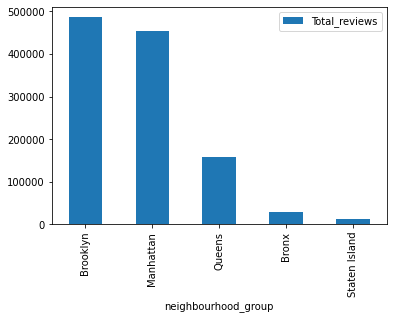

In [ ]:
pd.DataFrame(airbnb_data_df.groupby('neighbourhood_group')['number_of_reviews'].sum().sort_values(ascending=False)).rename({'number_of_reviews':'Total_reviews'},axis=1).plot.bar()

We conclude that Brooklyn and Manhattan has most number of reviews whereas staten island has least reviews may be because people not preffered this location may be because it is not developed that much.

## Average Price of the properties in each neighbourhood groups(Location)

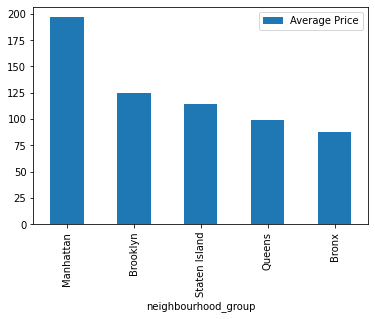

In [ ]:
pd.DataFrame(airbnb_data_df.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False)).rename({'price':'Average Price'},axis=1).plot.bar()

We see that in Manhattan the average price of the properties is higher may be because of the demand.

## Total number of Properties of each room type in different neighbourhood groups.

In [ ]:
r=airbnb_data_df.groupby('neighbourhood_group')['room_type'].value_counts().unstack()
r

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,379,652,60
Brooklyn,9559,10132,413
Manhattan,13199,7982,480
Queens,2096,3372,198
Staten Island,176,188,9


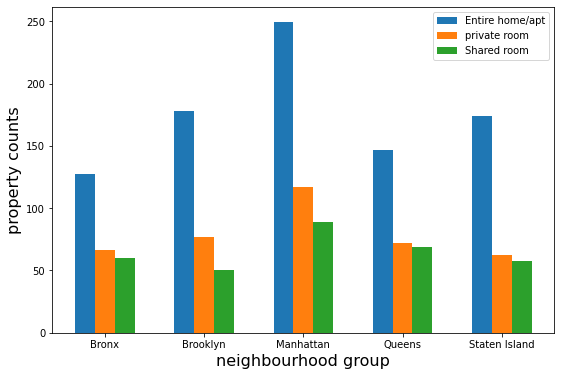

In [ ]:
plt.figure(figsize=(9,6))
w=0.2
bar_a=np.arange(5)
bar_b=[w+i for i in bar_a]
bar_c=[w+i for i in bar_b]
plt.bar(bar_a,list(r['Entire home/apt']),w,label='Entire home/apt')
plt.bar(bar_b,list(r['Private room']),w,label='private room')
plt.bar(bar_c,list(r['Shared room']),w,label='Shared room')
plt.xlabel('neighbourhood group',size=16)
plt.ylabel('property counts',size=16)
plt.xticks(bar_a+w,r.index)
plt.legend()
plt.show()

As we see that in Brooklyn and Manhattan their are more properties that offer entire room/apt may be because mostly people came for travelling purpose with their family.The shared room is least offered.

## Average Price of each room type at different locations

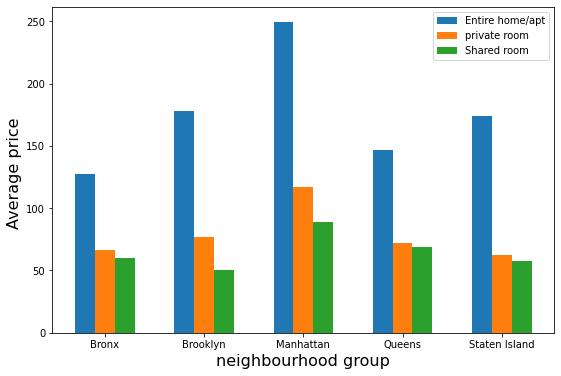

In [ ]:
r=airbnb_data_df.groupby(['neighbourhood_group','room_type'])['price'].mean().unstack()
plt.figure(figsize=(9,6))
w=0.2
bar_a=np.arange(5)
bar_b=[w+i for i in bar_a]
bar_c=[w+i for i in bar_b]
plt.bar(bar_a,list(r['Entire home/apt']),w,label='Entire home/apt')
plt.bar(bar_b,list(r['Private room']),w,label='private room')
plt.bar(bar_c,list(r['Shared room']),w,label='Shared room')
plt.xlabel('neighbourhood group',size=16)
plt.ylabel('Average price ',size=16)
plt.xticks(bar_a+w,r.index)
plt.legend()
plt.show()

## Total number of Hosts that provides Minimum night stays 

In [ ]:
#First we make the minimum night category.
def minimum_night_category(x):
  if x==1:
    return 'one day'
  if x>1 and x<=3:
    return '2-3 days'
  if x>3 and x<7:
    return 'few days'
  if x==7:
    return '1 week'
  elif x>7 and x<=29:
    return 'less than a month'
  elif x==30:
    return '1 month'
  elif x>30 and x<180:
    return 'more than a month'
  elif x>=180 and x<=365:
    return 'more than half year'
  elif x>365:
    return 'more than a year'  

#Creating a new column for the minimum night categories.
airbnb_data_df['minimum_night_category']=airbnb_data_df['minimum_nights'].apply(minimum_night_category)


In [ ]:
#Now make a Dataframe of the minimum night category and its total number of hosts.
d=pd.DataFrame(airbnb_data_df.groupby('minimum_night_category')['id'].count()).rename({'id':'count'},axis=1).reset_index().sort_values('count',ascending=False)
d

,minimum_night_category,count
2,2-3 days,19695
8,one day,12720
3,few days,7089
0,1 month,3760
4,less than a month,2826
1,1 week,2058
5,more than a month,623
7,more than half year,110
6,more than a year,14


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  after removing the cwd from sys.path.


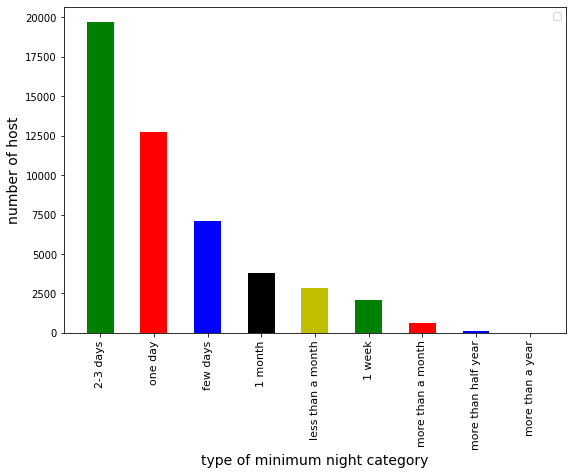

In [ ]:
w=0.5
plt.figure(figsize=(9,6))
bar1=np.arange(9)
plt.bar(bar1,d['count'],w,color='grbky')
plt.xlabel('type of minimum night category',size=14)
plt.ylabel('number of host',size=14)
plt.xticks(bar1,d['minimum_night_category'],rotation=90,fontsize=11)
plt.legend()
plt.show()

**Observations:** 
  From above graph we see that most Hosts provide 2-3 days as minimum night stay.
  We also see that there are 14 hosts which provide 365 days as minimum nights to stay.

### Total number of Hosts that provide 365 days as minimum nights to stay 

In [ ]:
airbnb_data_df[airbnb_data_df['availability_365']==365]['host_id'].count()

1295

So outof 48895, 1295 number of hosts provide 365 days to stay as minimum.